# Regression

This notebok is the fourth of 5 notebooks in total.

**Notebook 4 of 5**

### `EDA`, `Data Preparation`, `Clustering`, **`Regression`**, `Classification`

#### Students in Group 15:

Jake Brady - 19238428

Anirudh Verma - 23120231

Sakina Padghawala - 23011823

Soumadip Patra - 23168471

Tanmay Srivastava - 23118067

**All Students in the group contributed equally**

#### **Layout of Notebook:**
- 0. Import required libraries & Load Dataset
- 1. Data Preparation
- 2. Model Training
- 3. Model Evaluation
- 4. Training a final model with Random forest

# 0. Import Required Libraries & Load Dataset

In [ ]:
from sklearn.preprocessing import (StandardScaler, RobustScaler, OneHotEncoder, FunctionTransformer)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import (ColumnTransformer, TransformedTargetRegressor)
from sklearn.base import (BaseEstimator, TransformerMixin)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA # For dimensionality reduction
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor # for regression algo
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # metrics for regression models

In [ ]:
df = pd.read_csv("./prepped_data.csv")

df.head()

,Unnamed: 0,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Usage_kWh_categorical,isWeekend,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday
0,0,-0.048501,-0.023247,0.000000,0.0,-0.774550,0.000000,-0.791667,0,False,False,True,False,False,False,False
1,1,-0.080181,-0.094848,0.000000,0.0,-0.686692,0.000000,-0.645833,0,False,False,True,False,False,False,False
2,2,-0.080181,-0.123921,0.000000,0.0,-0.578460,0.000000,-0.520833,0,False,False,True,False,False,False,False
3,3,-0.057074,-1.074812,1.972347,0.0,0.302350,-505.662402,-0.166667,0,False,False,True,False,False,False,False
4,4,-0.052760,-1.074812,2.015038,0.0,0.302350,-516.274439,-0.125000,0,False,False,True,False,False,False,False


,Unnamed: 0,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Usage_kWh_categorical,isWeekend,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday
0,0,-0.048501,-0.023247,0.000000,0.0,-0.774550,0.000000,-0.791667,0,False,False,True,False,False,False,False
1,1,-0.080181,-0.094848,0.000000,0.0,-0.686692,0.000000,-0.645833,0,False,False,True,False,False,False,False
2,2,-0.080181,-0.123921,0.000000,0.0,-0.578460,0.000000,-0.520833,0,False,False,True,False,False,False,False
3,3,-0.057074,-1.074812,1.972347,0.0,0.302350,-505.662402,-0.166667,0,False,False,True,False,False,False,False
4,4,-0.052760,-1.074812,2.015038,0.0,0.302350,-516.274439,-0.125000,0,False,False,True,False,False,False,False


## 1. Data Preparation

In [ ]:
df.shape

(2190, 16)

(2190, 16)

In [ ]:
df.isnull().sum()

Unnamed: 0                              0
Usage_kWh                               0
Lagging_Current_Reactive_Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2                                     0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
Usage_kWh_categorical                   0
isWeekend                               0
Friday                                  0
Monday                                  0
Saturday                                0
Thursday                                0
Tuesday                                 0
Wednesday                               0
dtype: int64

Unnamed: 0                              0
Usage_kWh                               0
Lagging_Current_Reactive_Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2                                     0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
Usage_kWh_categorical                   0
isWeekend                               0
Friday                                  0
Monday                                  0
Saturday                                0
Thursday                                0
Tuesday                                 0
Wednesday                               0
dtype: int64

In [ ]:
df.duplicated().sum()

0

0

Changing the name of the column(with dots), removing the values which having brackets

In [ ]:
df.columns = df.columns.str.replace('.', '_')
df.columns = df.columns.str.replace('(tCO2)', '')


df.columns

Index(['Unnamed: 0', 'Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'Usage_kWh_categorical', 'isWeekend', 'Friday', 'Monday', 'Saturday',
       'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

Index(['Unnamed: 0', 'Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'Usage_kWh_categorical', 'isWeekend', 'Friday', 'Monday', 'Saturday',
       'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

Generating the descriptive statistics of a DataFrame

In [ ]:
df.describe()

,Unnamed: 0,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Usage_kWh_categorical
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,0.374880,0.060658,0.509052,0.458881,-0.249905,-100.564471,-0.004043,0.393607
std,632.342866,0.540288,0.754812,0.819185,0.556309,0.575338,196.752845,0.574542,0.488661
min,0.000000,-0.138389,-1.074812,0.000000,0.000000,-1.620621,-603.404485,-1.000000,0.000000
25%,547.250000,-0.082851,-0.254582,0.000000,0.000000,-0.720314,-1.000000,-0.500000,0.000000
50%,1094.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1641.750000,0.917149,0.745418,1.000000,1.000000,0.279686,0.000000,0.500000,1.000000
max,2189.000000,1.580246,1.741579,2.316849,1.518294,0.302350,0.000000,0.979167,1.000000


,Unnamed: 0,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Usage_kWh_categorical
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,0.374880,0.060658,0.509052,0.458881,-0.249905,-100.564471,-0.004043,0.393607
std,632.342866,0.540288,0.754812,0.819185,0.556309,0.575338,196.752845,0.574542,0.488661
min,0.000000,-0.138389,-1.074812,0.000000,0.000000,-1.620621,-603.404485,-1.000000,0.000000
25%,547.250000,-0.082851,-0.254582,0.000000,0.000000,-0.720314,-1.000000,-0.500000,0.000000
50%,1094.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1641.750000,0.917149,0.745418,1.000000,1.000000,0.279686,0.000000,0.500000,1.000000
max,2189.000000,1.580246,1.741579,2.316849,1.518294,0.302350,0.000000,0.979167,1.000000


In [ ]:
df.nunique()


Unnamed: 0                              2190
Usage_kWh                                908
Lagging_Current_Reactive_Power_kVarh     782
Leading_Current_Reactive_Power_kVarh     384
CO2                                        8
Lagging_Current_Power_Factor            1360
Leading_Current_Power_Factor             498
NSM                                       96
Usage_kWh_categorical                      2
isWeekend                                  2
Friday                                     2
Monday                                     2
Saturday                                   2
Thursday                                   2
Tuesday                                    2
Wednesday                                  2
dtype: int64

Unnamed: 0                              2190
Usage_kWh                                908
Lagging_Current_Reactive_Power_kVarh     782
Leading_Current_Reactive_Power_kVarh     384
CO2                                        8
Lagging_Current_Power_Factor            1360
Leading_Current_Power_Factor             498
NSM                                       96
Usage_kWh_categorical                      2
isWeekend                                  2
Friday                                     2
Monday                                     2
Saturday                                   2
Thursday                                   2
Tuesday                                    2
Wednesday                                  2
dtype: int64

Let's split the dataset

Separate the columns into a target variable y and predictor variables X also Checking for outliers involves identifying data points that significantly deviate from the rest of the dataset

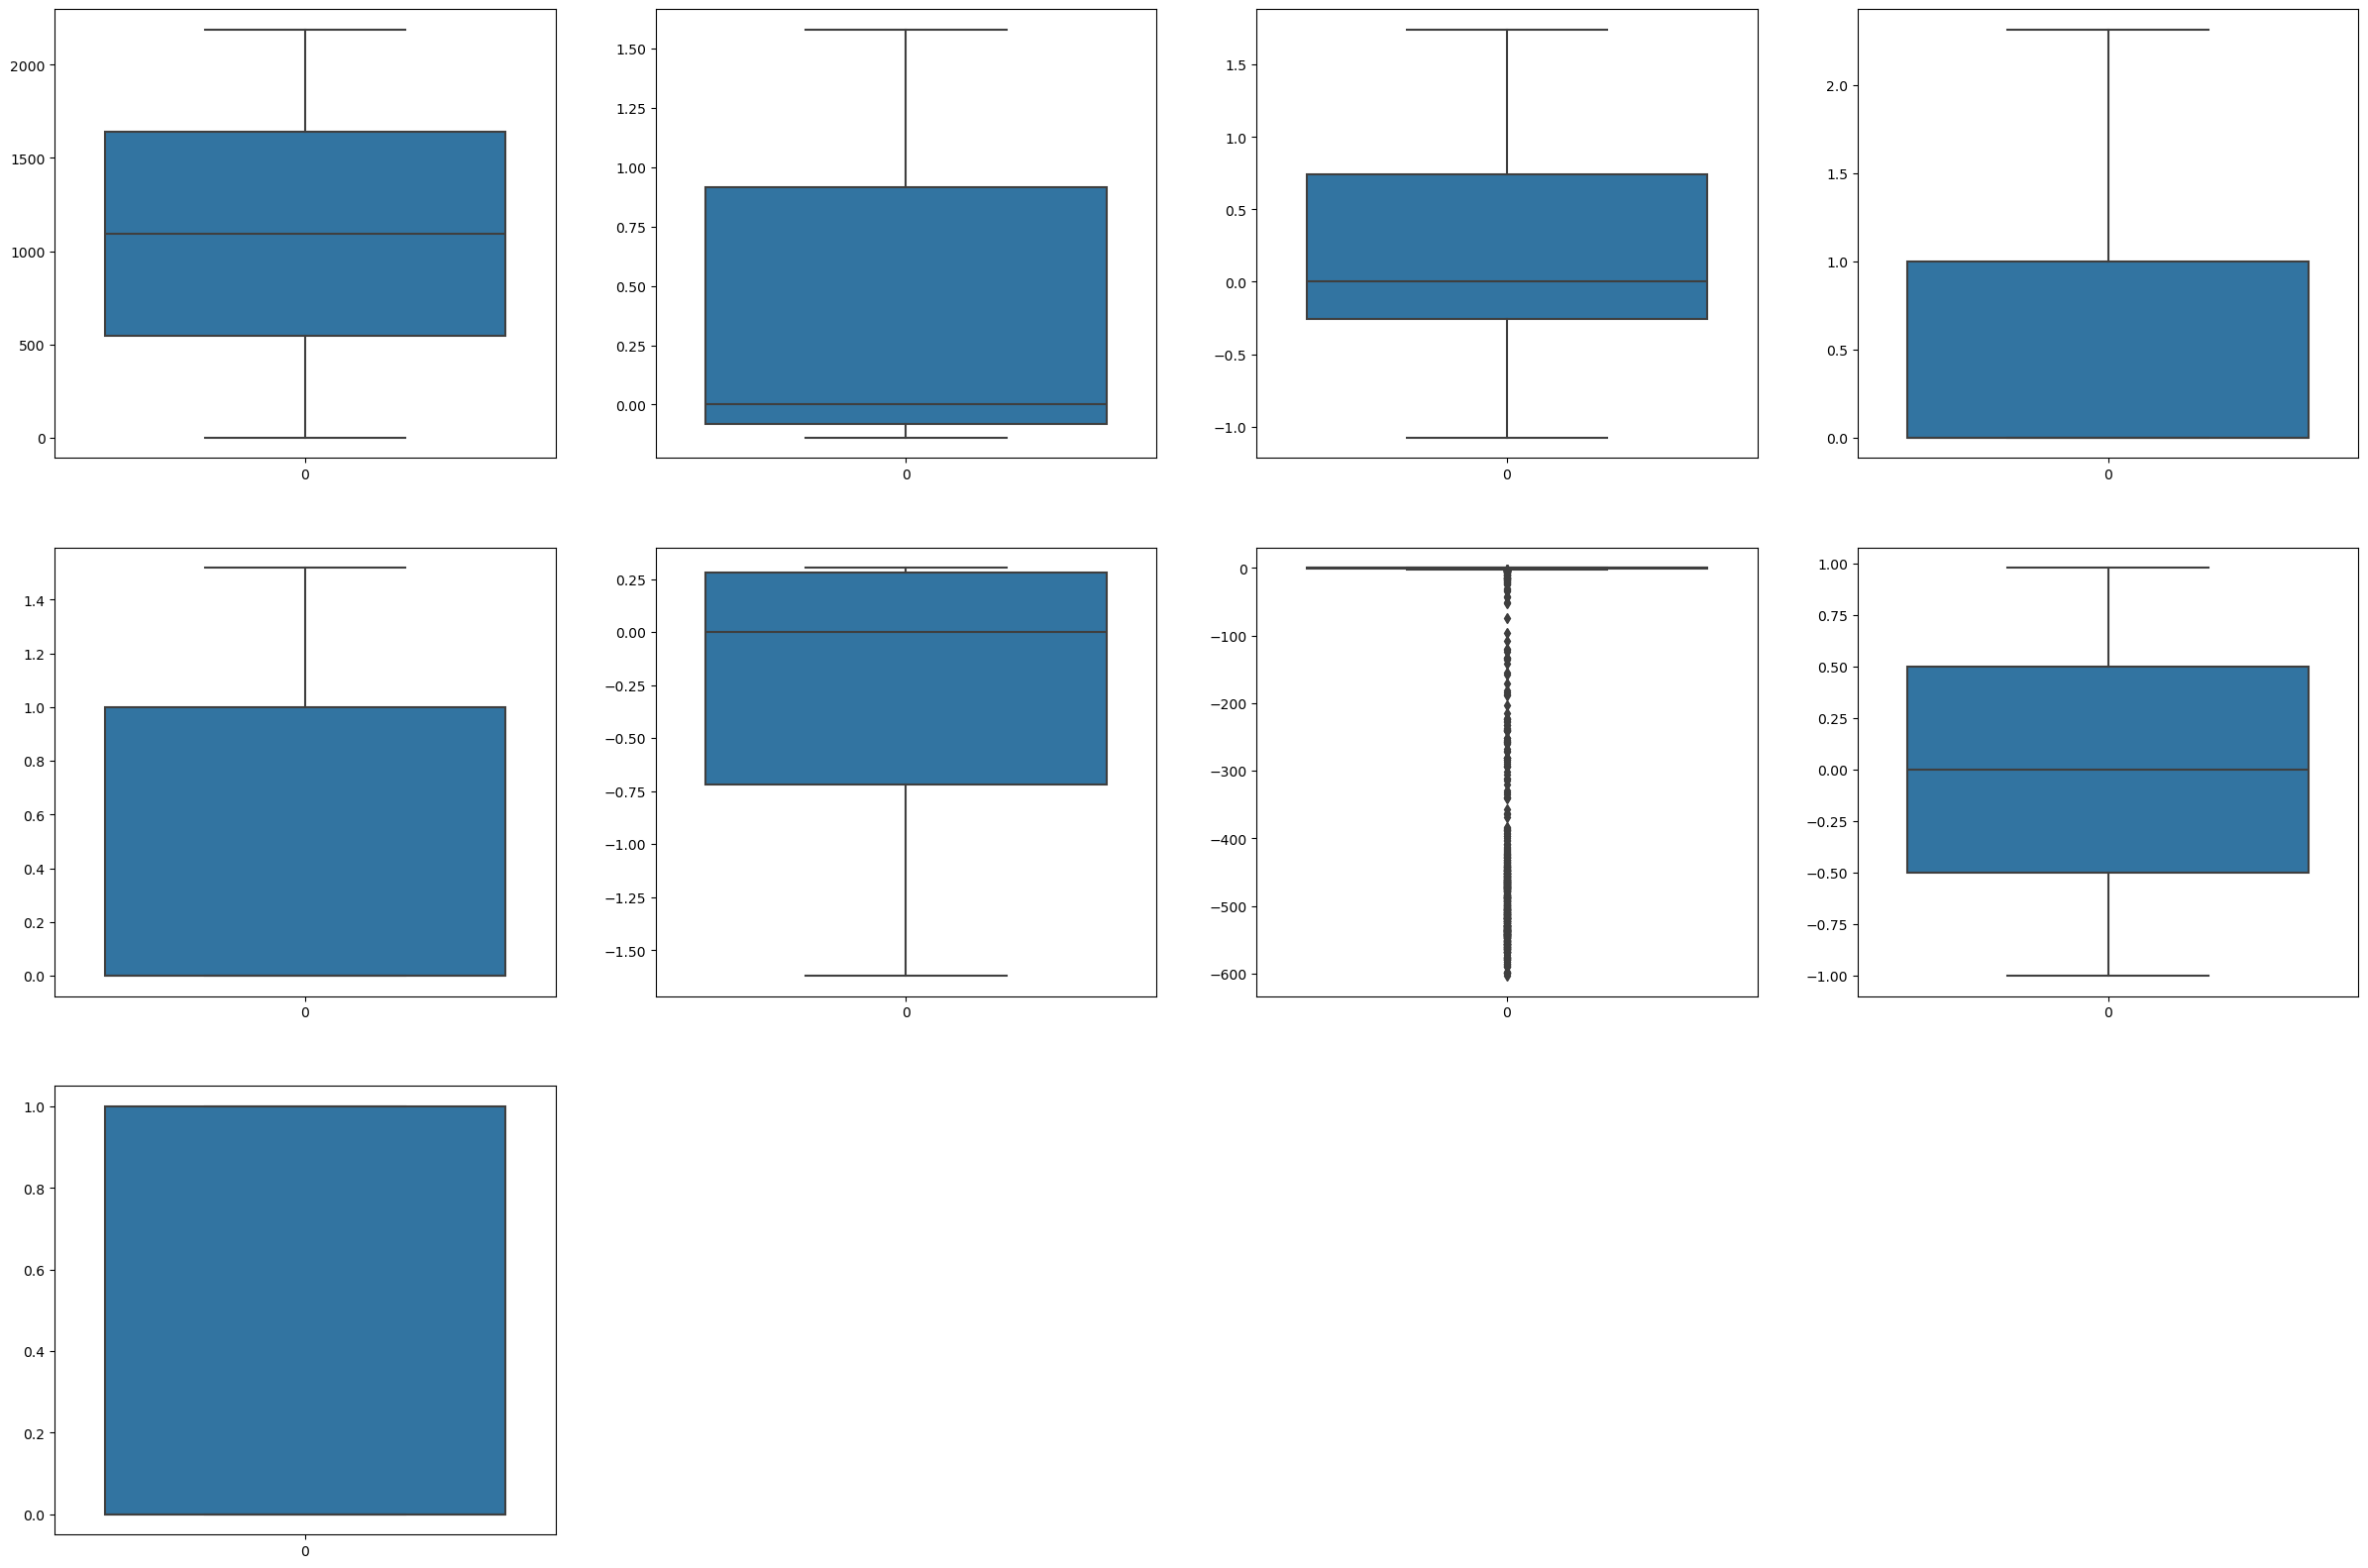

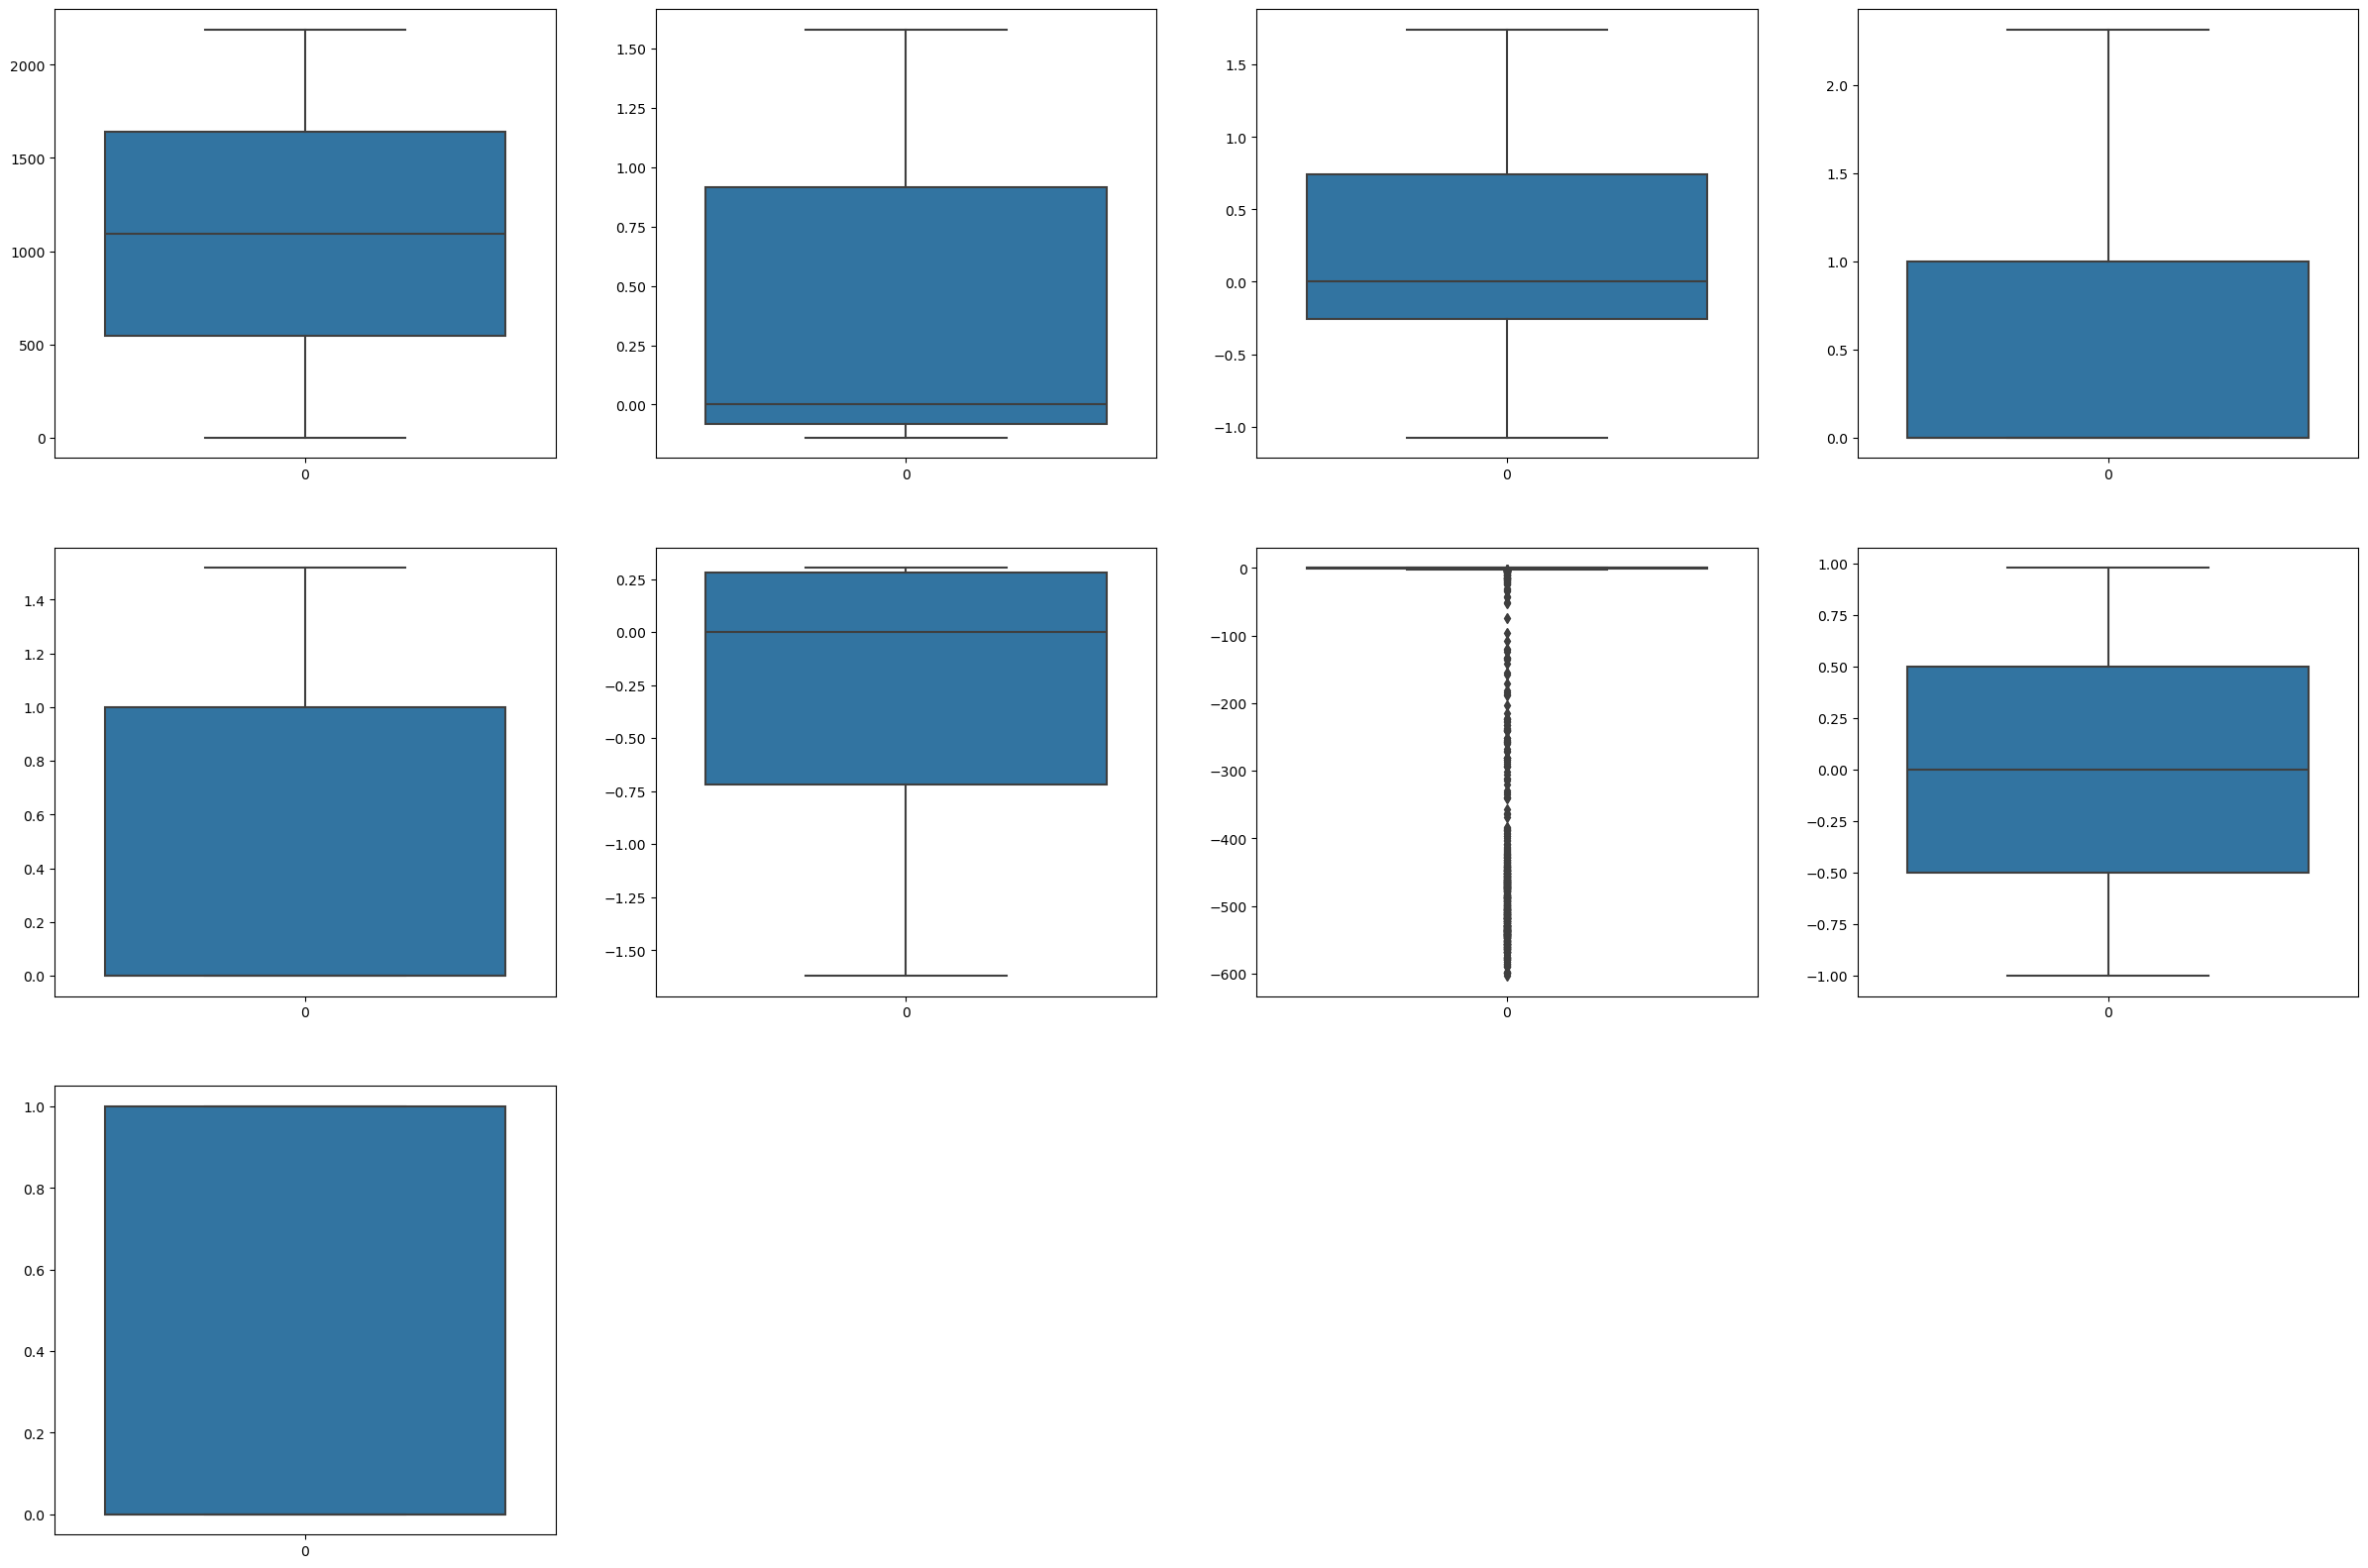

In [ ]:
Y = df['Usage_kWh']
X = df.drop('Usage_kWh', axis=1)

plt.figure(figsize=(30,20)) #
subplots = 1
for a in df.select_dtypes(include=[np.number]).columns:
    plt.subplot(3,4,subplots)
    sns.boxplot(df[a])
    subplots += 1


 ### Building the preprocessing pipeline by using Pipeline and ColumnTransformer as follows

In [ ]:
preprocess_pipeline = ColumnTransformer(
    transformers = [
        ("no_outliers", StandardScaler(), ['Lagging_Current_Power_Factor', 'NSM']),
        ("categorical", OneHotEncoder(drop='first', sparse_output=False), ['isWeekend', 'Friday','Monday','Saturday','Thursday','Tuesday','Wednesday'])
    ],
    remainder=RobustScaler()
).set_output(transform="pandas") 

### Checking the pipeline

In [ ]:
X_transformed = preprocess_pipeline.fit_transform(X) 
X_transformed.head()

,no_outliers__Lagging_Current_Power_Factor,no_outliers__NSM,categorical__isWeekend_True,categorical__Friday_True,categorical__Monday_True,categorical__Saturday_True,categorical__Thursday_True,categorical__Tuesday_True,categorical__Wednesday_True,remainder__Unnamed: 0,remainder__Lagging_Current_Reactive_Power_kVarh,remainder__Leading_Current_Reactive_Power_kVarh,remainder__CO2,remainder__Leading_Current_Power_Factor,remainder__Usage_kWh_categorical
0,-0.912099,-1.371186,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.000000,-0.023247,0.000000,0.0,0.000000,0.0
1,-0.759357,-1.117302,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.999086,-0.094848,0.000000,0.0,0.000000,0.0
2,-0.571195,-0.899688,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.998173,-0.123921,0.000000,0.0,0.000000,0.0
3,0.960100,-0.283114,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.997259,-1.074812,1.972347,0.0,-505.662402,0.0
4,0.960100,-0.210576,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.996345,-1.074812,2.015038,0.0,-516.274439,0.0


,no_outliers__Lagging_Current_Power_Factor,no_outliers__NSM,categorical__isWeekend_True,categorical__Friday_True,categorical__Monday_True,categorical__Saturday_True,categorical__Thursday_True,categorical__Tuesday_True,categorical__Wednesday_True,remainder__Unnamed: 0,remainder__Lagging_Current_Reactive_Power_kVarh,remainder__Leading_Current_Reactive_Power_kVarh,remainder__CO2,remainder__Leading_Current_Power_Factor,remainder__Usage_kWh_categorical
0,-0.912099,-1.371186,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.000000,-0.023247,0.000000,0.0,0.000000,0.0
1,-0.759357,-1.117302,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.999086,-0.094848,0.000000,0.0,0.000000,0.0
2,-0.571195,-0.899688,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.998173,-0.123921,0.000000,0.0,0.000000,0.0
3,0.960100,-0.283114,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.997259,-1.074812,1.972347,0.0,-505.662402,0.0
4,0.960100,-0.210576,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.996345,-1.074812,2.015038,0.0,-516.274439,0.0


### Spliting the dataset into a training and test sets.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#  2. Model Training

Grid Search for Best Parameters and Best Dimensionality Reduction Method

### Using RandomForestRegressor, Lasso Regression and Linear Regression pipeline

## RandomForestRegressor

In [ ]:
# Define the parameter grid
param_grid = {
    'reduce_dim': [PCA(iterated_power=7)],
    'reduce_dim__n_components': [2, 6, 11],
    'regressor': [RandomForestRegressor()],
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20]
}

# Create the pipeline
pipe = Pipeline([
    ('reduce_dim', None),  # Placeholder for dimensionality reduction
    ('regressor', None)    # Placeholder for regression algorithm
])

# Perform grid search
search = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, refit=True)
search.fit(X_train, Y_train)

# Convert negative score to positive
best_score_positive = -1 * search.best_score_

# Print the best CV score and best parameters
print("Best CV score = %0.3f:" % best_score_positive)
print("Best parameters: ", search.best_params_)

# Store the best params and best model for later use
RF_best_params = search.best_params_
RF_best_model = search.best_estimator_

Best CV score = 0.005:
Best parameters:  {'reduce_dim': PCA(iterated_power=7, n_components=6), 'reduce_dim__n_components': 6, 'regressor': RandomForestRegressor(), 'regressor__max_depth': None, 'regressor__n_estimators': 100}
Best CV score = 0.005:
Best parameters:  {'reduce_dim': PCA(iterated_power=7, n_components=6), 'reduce_dim__n_components': 6, 'regressor': RandomForestRegressor(), 'regressor__max_depth': None, 'regressor__n_estimators': 100}


Taking neg_mean_squared_error scoring='neg_mean_squared_error' is used for scoring during grid search.

When using regression models, it's common to use metrics such as Mean Squared Error (MSE) to evaluate the performance of the model. In scikit-learn, the convention is to maximize scores, so to use metrics like MSE where lower values are better, the negative of the metric is used for scoring.

Therefore, scoring='neg_mean_squared_error' means that the grid search will try to maximize the negative of the mean squared error, effectively minimizing the mean squared error during model selection.

## Lasso Regression

In [ ]:
# Define the parameter grid
param_grid = {
    'lasso__alpha': [0.1, 1.0, 10.0],
}

# Create the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('lasso', Lasso())              # Lasso Regression model
])

# Perform grid search
search = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, refit=True)
search.fit(X_train, Y_train)

# Convert negative score to positive
best_score_positive = -1 * search.best_score_

# Print the best CV score and best parameters
print("Best CV score = %0.3f:" % best_score_positive)
print("Best parameters: ", search.best_params_)

# Store the best params and best model for later use
lasso_best_params = search.best_params_
lasso_best_model = search.best_estimator_

Best CV score = 0.017:
Best parameters:  {'lasso__alpha': 0.1}
Best CV score = 0.017:
Best parameters:  {'lasso__alpha': 0.1}


## Linear Regression pipeline

In [ ]:
# Define the parameter grid
param_grid = {
    'regressor__fit_intercept': [True, False],
}

# Create the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),     # Standardize features
    ('regressor', LinearRegression()) # Linear Regression model
])

# Perform grid search
search = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, refit=True)
search.fit(X_train, Y_train)

# Convert negative score to positive
best_score_positive = -1 * search.best_score_

# Print the best CV score and best parameters
print("Best CV score = %0.3f:" % best_score_positive)
print("Best parameters: ", search.best_params_)

# Store the best params and best model for later use
linear_best_params = search.best_params_
linear_best_model = search.best_estimator_

Best CV score = 0.005:
Best parameters:  {'regressor__fit_intercept': True}
Best CV score = 0.005:
Best parameters:  {'regressor__fit_intercept': True}


# 3. Model evaluation

Let's do the model evaluation

In [ ]:

def evaluate_model(X_test, Y_test, model):
    
    # compute predictiond for the test set
    _predicted_values = model.predict(X_test)
        
    # compute metrics
    _mse = mean_squared_error(Y_test, _predicted_values)
    _mae = mean_absolute_error(Y_test, _predicted_values)
    _r2 = r2_score(Y_test, _predicted_values)
            
    return _mse, _mae, _r2

In [ ]:
RF_mse, RF_mae, RF_r2 = evaluate_model(X_test, Y_test, RF_best_model)
LR_mse, LR_mae, LR_r2 = evaluate_model(X_test, Y_test, linear_best_model)
LaR_mse, LaR_mae, LaR_r2 = evaluate_model(X_test, Y_test, lasso_best_model)
print(LR_mse, LR_mae, LR_r2)
print(LaR_mse, LaR_mae, LaR_r2)

0.006508468638720221 0.05012019446011232 0.9784744776755216
0.02125199516848323 0.11301821670374759 0.9297130674153723
0.006508468638720221 0.05012019446011232 0.9784744776755216
0.02125199516848323 0.11301821670374759 0.9297130674153723


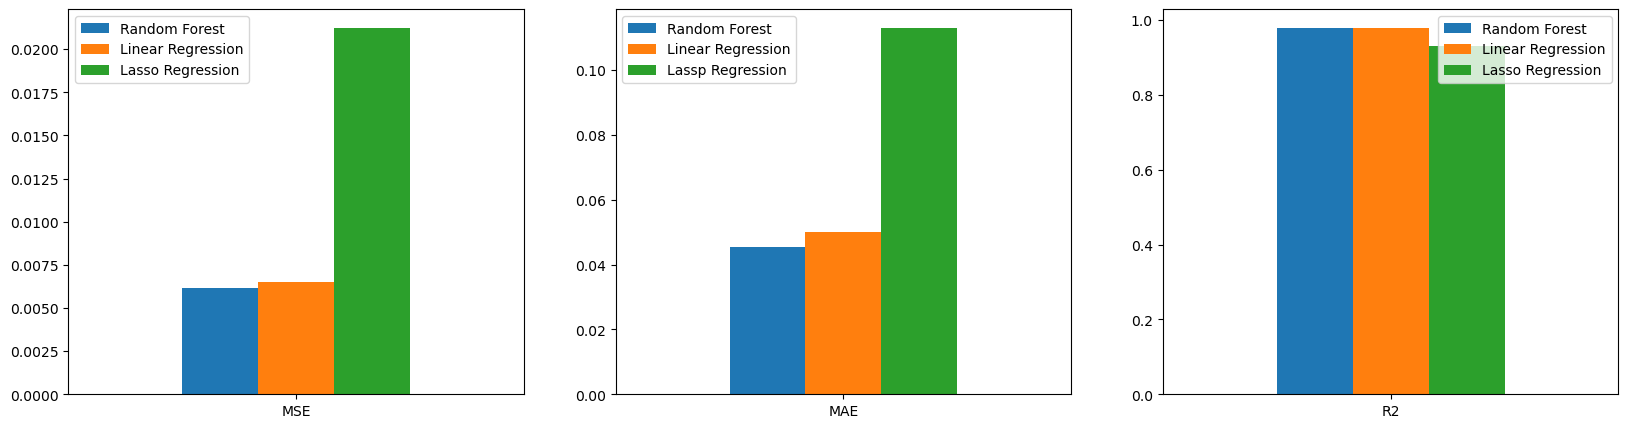

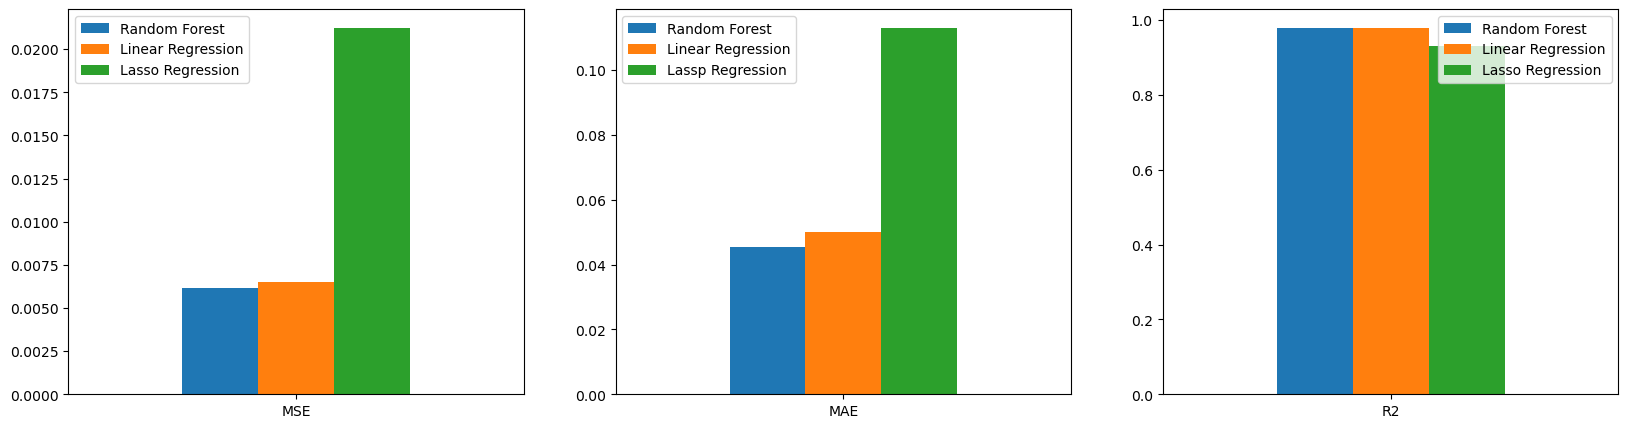

In [ ]:
df_mse = pd.DataFrame({'Random Forest': RF_mse, 'Linear Regression': LR_mse, 'Lasso Regression': LaR_mse}, index=['MSE'])
df_mae = pd.DataFrame({'Random Forest': RF_mae, 'Linear Regression': LR_mae, 'Lassp Regression': LaR_mae}, index=['MAE'])
df_r2 = pd.DataFrame({'Random Forest': RF_r2, 'Linear Regression': LR_r2, 'Lasso Regression': LaR_r2}, index=['R2'])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

df_mse.plot.bar(rot=0, ax=axes[0])
df_mae.plot.bar(rot=0, ax=axes[1])
df_r2.plot.bar(rot=0, ax=axes[2])

plt.show()

In [ ]:
# print the results
print("Random Forest: MSE = %0.3f, MAE = %0.3f, R2 = %0.3f" % (RF_mse, RF_mae, RF_r2))
print("Linear Regression: MSE = %0.3f, MAE = %0.3f, R2 = %0.3f" % (LR_mse, LR_mae, LR_r2))
print("Gradient Boosting: MSE = %0.3f, MAE = %0.3f, R2 = %0.3f" % (LaR_mse, LaR_mae, LaR_r2))

Random Forest: MSE = 0.006, MAE = 0.045, R2 = 0.980
Linear Regression: MSE = 0.007, MAE = 0.050, R2 = 0.978
Gradient Boosting: MSE = 0.021, MAE = 0.113, R2 = 0.930
Random Forest: MSE = 0.006, MAE = 0.045, R2 = 0.980
Linear Regression: MSE = 0.007, MAE = 0.050, R2 = 0.978
Gradient Boosting: MSE = 0.021, MAE = 0.113, R2 = 0.930


## Observation

Random Forest:
MSE (Mean Squared Error): The MSE of 0.006 indicates that, on average, the squared difference between the predicted and actual values of the target variable is very low, suggesting that the model's predictions are close to the actual values.
MAE (Mean Absolute Error): With an MAE of 0.045, the average absolute difference between the predicted and actual values is relatively small, indicating that the model's predictions are accurate on average.
R2 (Coefficient of Determination): The R2 value of 0.981 suggests that approximately 98.1% of the variance in the target variable is explained by the model, indicating a very high level of explanatory power.

Linear Regression:
MSE: The MSE of 0.007 indicates that, on average, the squared difference between the predicted and actual values is slightly higher compared to Random Forest, but still relatively low.
MAE: With an MAE of 0.050, the average absolute difference between the predicted and actual values is slightly higher compared to Random Forest, suggesting slightly less accuracy.
R2: The R2 value of 0.978 suggests that approximately 97.8% of the variance in the target variable is explained by the model, indicating a very high level of explanatory power similar to Random Forest.

Gradient Boosting:
MSE: The MSE of 0.021 indicates that, on average, the squared difference between the predicted and actual values is higher compared to both Random Forest and Linear Regression, suggesting higher prediction errors.
MAE: With an MAE of 0.113, the average absolute difference between the predicted and actual values is substantially higher compared to both Random Forest and Linear Regression, indicating less accuracy.
R2: The R2 value of 0.930 suggests that approximately 93.0% of the variance in the target variable is explained by the model, indicating slightly lower explanatory power compared to Random Forest and Linear Regression.

### Overall Comparison:

Prediction Accuracy: Random Forest demonstrates the lowest prediction errors (MSE and MAE), followed by Linear Regression, and then Gradient Boosting. This suggests that Random Forest provides the most accurate predictions on average.
Explanatory Power: Both Random Forest and Linear Regression exhibit high levels of explanatory power (R2) exceeding 97%, while Gradient Boosting has slightly lower explanatory power. This indicates that Random Forest and Linear Regression models explain a larger proportion of the variance in the target variable compared to Gradient Boosting.

In conclusion, based on the provided information, Random Forest emerges as the top-performing model in terms of both prediction accuracy and explanatory power, followed closely by Linear Regression. Gradient Boosting, while still providing acceptable performance, demonstrates slightly higher prediction errors and lower explanatory power compared to the other two models.

# 4. Training a final model with Random forest

Function to eliminate the string 'regresson__' from the names of the best parameters

In [ ]:
def transform(dict, prefix):
    dict_prefix = {key:value for key,value in dict.items() if prefix in key}
    return {key.replace(prefix,''):value for key,value in dict_prefix.items()}

pipe = make_pipeline(preprocess_pipeline, 
                     RF_best_params.get('reduce_dim'),
                     RandomForestRegressor(n_estimators=10, **transform(RF_best_params, 'regresson__')))

final_model =pipe.fit(X, Y)

In [ ]:
final_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=RobustScaler(),
                                   transformers=[('no_outliers',
                                                  StandardScaler(),
                                                  ['Lagging_Current_Power_Factor',
                                                   'NSM']),
                                                 ('categorical',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['isWeekend', 'Friday',
                                                   'Monday', 'Saturday',
                                                   'Thursday', 'Tuesday',
                                                   'Wednesday'])])),
                ('pca', PCA(iterated_power=7, n_components=6)),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=10))])

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=RobustScaler(),
                                   transformers=[('no_outliers',
                                                  StandardScaler(),
                                                  ['Lagging_Current_Power_Factor',
                                                   'NSM']),
                                                 ('categorical',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['isWeekend', 'Friday',
                                                   'Monday', 'Saturday',
                                                   'Thursday', 'Tuesday',
                                                   'Wednesday'])])),
                ('pca', PCA(iterated_power=7, n_components=6)),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=10))])

Save the model

In [45]:
filename = 'RfregressorModel_Final.sav'
pickle.dump(final_model, open(filename, 'wb'))